## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,Dropout 
from keras.regularizers import  L1,L2 

## creating datapoints on the image with mouse click

In [2]:
dataset=[]
 
def draw(event,x,y,flag,param):
    if event==cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(0,0,255),-1)
    elif event==cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,255,0),-1) 

In [3]:
img=np.full((400,400,3),255,np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1)&255==ord("q"):
        break 
cv2.destroyAllWindows() 

In [4]:
len(dataset) 

74

In [5]:
df=pd.DataFrame(dataset)

In [6]:
df 

,0,1,2
0,205,205,0
1,53,118,1
2,28,140,1
3,213,227,0
4,224,224,0
...,...,...,...
69,331,365,1
70,336,350,1
71,315,386,1
72,350,386,1


In [7]:
df.iloc[:,2].value_counts()

0    37
1    37
Name: 2, dtype: int64

## saving the data to a csv file

In [10]:
df.to_csv("data_points.csv",index=False)

## Import the csv file 

In [11]:
df=pd.read_csv("data_points.csv")
df.head() 

,0,1,2
0,205,205,0
1,53,118,1
2,28,140,1
3,213,227,0
4,224,224,0


## splitting into input and output features

In [12]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

## splitting the data into train and test 

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardizing the input features

In [14]:
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.transform(x_test) 

## creating the logical structure

In [15]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=2)) 
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model

In [17]:
from keras.optimizers import SGD 

In [27]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 1s 54ms/step - loss: 0.4776 - accuracy: 0.8983 - val_loss: 0.4683 - val_accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.4760 - accuracy: 0.8983 - val_loss: 0.4669 - val_accuracy: 1.0000
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4743 - accuracy: 0.8983 - val_loss: 0.4654 - val_accuracy: 1.0000
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.4728 - accuracy: 0.8983 - val_loss: 0.4638 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.4716 - accuracy: 0.8983 - val_loss: 0.4622 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4701 - accuracy: 0.8983 - val_loss: 0.4608 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4685 - accuracy: 0.8983 - val_loss: 0.4592 - val_accuracy: 1.0000
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 13ms/step - loss: 0.3948 - accuracy: 0.9492 - val_loss: 0.3817 - val_accuracy: 1.0000
Epoch 60/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3932 - accuracy: 0.9492 - val_loss: 0.3803 - val_accuracy: 1.0000
Epoch 61/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3919 - accuracy: 0.9661 - val_loss: 0.3788 - val_accuracy: 1.0000
Epoch 62/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3904 - accuracy: 0.9492 - val_loss: 0.3772 - val_accuracy: 1.0000
Epoch 63/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3892 - accuracy: 0.9492 - val_loss: 0.3758 - val_accuracy: 1.0000
Epoch 64/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3878 - accuracy: 0.9492 - val_loss: 0.3743 - val_accuracy: 1.0000
Epoch 65/100
6/6 [==============================] - 0s 12ms/step - loss: 0.3866 - accuracy: 0.9661 - val_loss: 0.3727 - val_accuracy: 1.0000
Epoch 66/100
6/6 [========

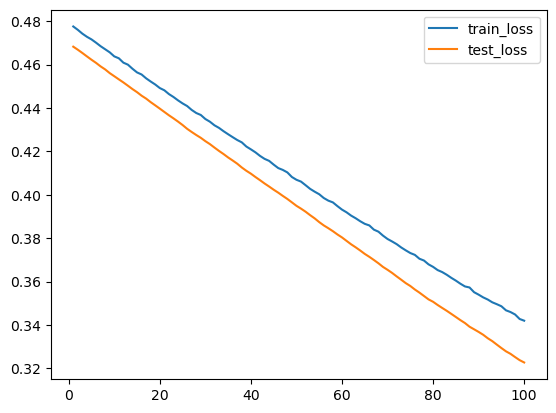

In [28]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend()  

## make predictions using the model

In [29]:
predicted=model.predict(X_test)
predicted 

1/1 [==============================] - 0s 82ms/step


array([[0.62713635],
       [0.8625461 ],
       [0.29222235],
       [0.2500447 ],
       [0.40132794],
       [0.24154547],
       [0.23016831],
       [0.7981351 ]], dtype=float32)

In [30]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

## evaluating the model

1.0


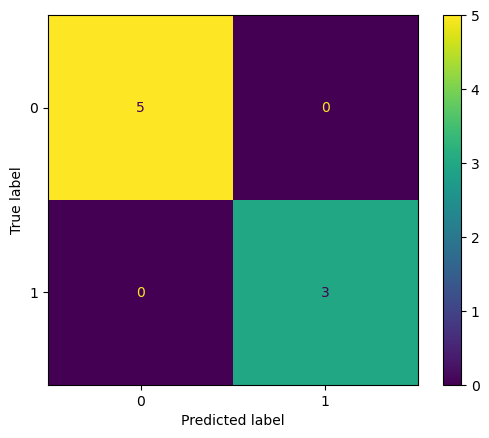

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 
 

## plotting the decision surface

In [32]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

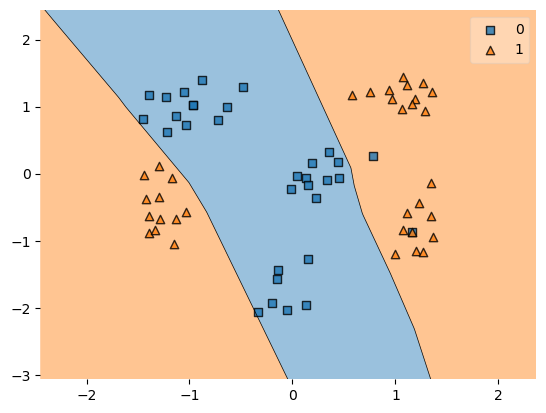

In [33]:
plot_decision_regions(X_train,y_train.values,clf=model) 

9600/9600 [==============================] - 20s 2ms/step


<AxesSubplot:>

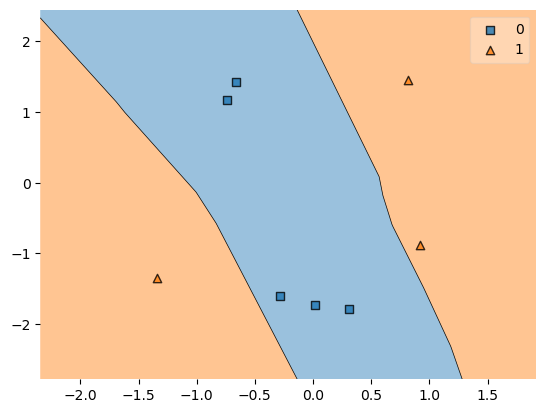

In [34]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model) 

## Conclusions:

###### This neural network model achieves an accuracy of 96%. The model architecture consists of 2 hidden layers with the following specifications:

- In the first hidden layer, there are 8 neurons with the ReLU activation function.
- In the second hidden layer, there are 6 neurons with the ReLU activation function.


###### The output layer uses the sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 5 and a learning rate of 0.01.
- The model was trained for 100 epochs.
